# Summary
This dataset was really interesting for me. Always making a decision which fuel should I choose, the cheaper with more consumption or the more expensive but with moderated consumption - at least, this is my original vision. I was really happy, when I found this dataset. Maybe this can help me, which is better. The owner of the data did a really great job, when collected the informations. The trip distances and average speeds are pretty standardized. So I was convinced that I can get a valuable result.

Here are my steps:
 0. Import libraries, loading the data
 1. Refine the data
 2. Data exploration
 3. Aggregating the data
 4. Data cleaning (correcting, refilling values)
 5. Linear Regression
 6. Evaluating the results

# Conlusion

One of my professor said. If you read an article, you should start with the abstract, when it is interesting then you can read the conclusion, and when it is still interesting then you can read the full document. So I write my conclusion hear, then you can save time, without rolling over the full document... :)

The fuel type is not so important as I first thought. But it was really interesting to see, which are the connections between the different parameters. I had played around a lot with the data before I made the regression models. Amongst other things, I did a data correction, because I thought that the fuel consumptions according to the display of the car is not precise. The linear regression has been evaluated with the original consumption, then with the corrected values. Furthermore, I make two different test-training splits. The result at the end is not so obvious at least for me. With the SP98 the consumption is less, but the differences are really small. I did some evaluation in my regression models, and I have found that neither of the models works fine. I think the data what I evaluated is ok, but the linear regression here is not able to do a precise job for our purposes.


I hope you like the results and you find this way of thinking interesting.
By the way, this was my first project on Kaggle.


# Step 0: Import libraries, loading the data

In [7]:
import numpy as np
import pandas as pd
#Importing the libraries to visualize
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [8]:
#Creating the DataFrame
df = pd.read_csv('measurements.csv')

# Step 1: Refine the data

Let's see what's in the data!

In [9]:
#Checking the head of the data
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


**Most of the columns are not float --> The values has to be converted**

In [10]:
#Creating a function to convert the values
def comma_converter(x):
    if type(x) == str and ',' in x:
        a = x.split(',')
        return float(a[0] + '.' + a[1])
    else:
        return float(x)
    
#Converting the data
df['distance'] = df['distance'].apply(comma_converter)
df['consume'] = df['consume'].apply(comma_converter)
df['temp_inside'] = df['temp_inside'].apply(comma_converter)
df['temp_outside'] = df['temp_outside'].apply(comma_converter)
df['refill liters'] = df['refill liters'].apply(comma_converter)

Creating a column with the absolute distance from the beginning of the experiment, and another column with the consumed fuel in liter pro trip.

In [11]:
df['km_absolute'] = df['distance'].cumsum()
df['consume_liter'] = df['consume']/100*df['distance']

# Step 2: Data Exploration

**Visualizing the data**

First, I would like to see how good is the data, and what is inside of the data. The relations between the distance, speed, consume, refill volume should be ok. How distributing the trip distances along the full range etc.:
1. distance vs Km_Absolute
2. consume vs distance 
3. temp_outside vs km_absolute
4. consume vs speed
5. refill liters vs km_absolute

The colors representing the gas type inside of the tank.

Text(26.689586397058825, 0.5, 'distance [Km]')

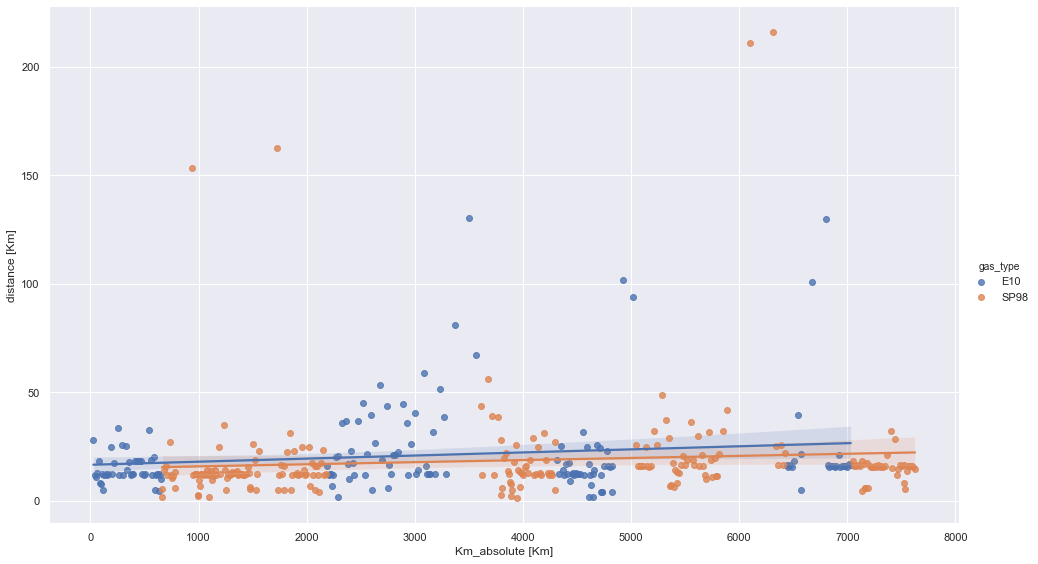

In [12]:
#Distance vs Km_Absolute
#How the the distances distributing during the full distance 
sns.lmplot(data=df,x='km_absolute',y='distance', hue='gas_type', height=8, aspect=1.7,)
plt.xlabel('Km_absolute [Km]')
plt.ylabel('distance [Km]')

Text(26.272996323529412, 0.5, 'consume [l/100km]')

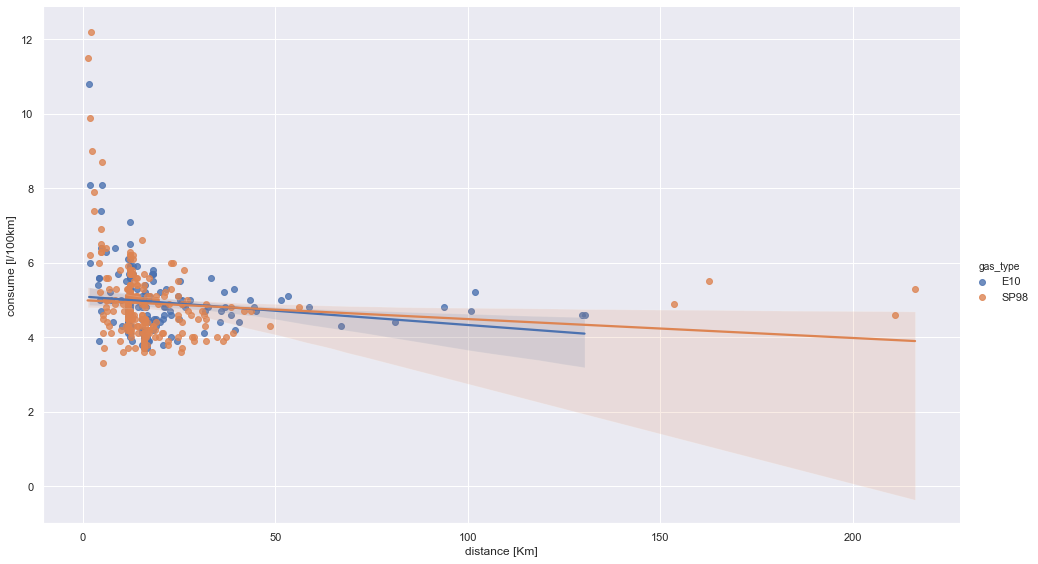

In [13]:
#Consume vs Km_absolute
sns.lmplot(data = df, x = 'distance', y = 'consume', hue = 'gas_type', height=8,aspect=1.7)
plt.xlabel('distance [Km]')
plt.ylabel('consume [l/100km]')

Text(26.34006318933823, 0.5, 'temp_outside [°C]')

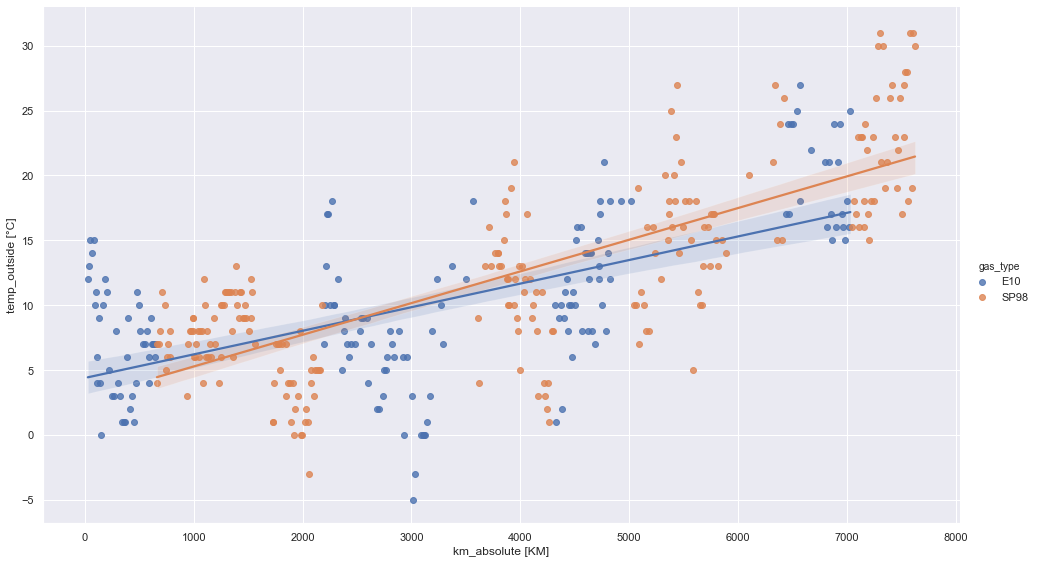

In [14]:
sns.lmplot(data = df, x = 'km_absolute', y =  'temp_outside',hue='gas_type', height=8, aspect=1.7)
plt.xlabel('km_absolute [KM]')
plt.ylabel('temp_outside [°C]')

Text(26.272996323529412, 0.5, 'consume [l/100km]')

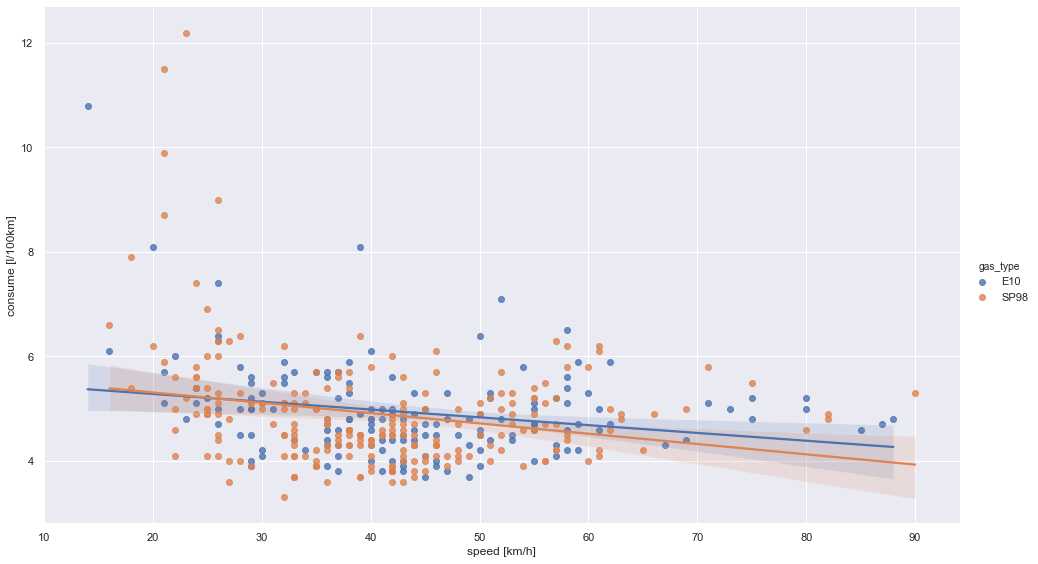

In [15]:
sns.lmplot(data=df, x = 'speed',y =  'consume',hue = 'gas_type', height=8, aspect=1.7)
plt.xlabel('speed [km/h]')
plt.ylabel('consume [l/100km]')

Text(0, 0.5, 'refill liters [l]')

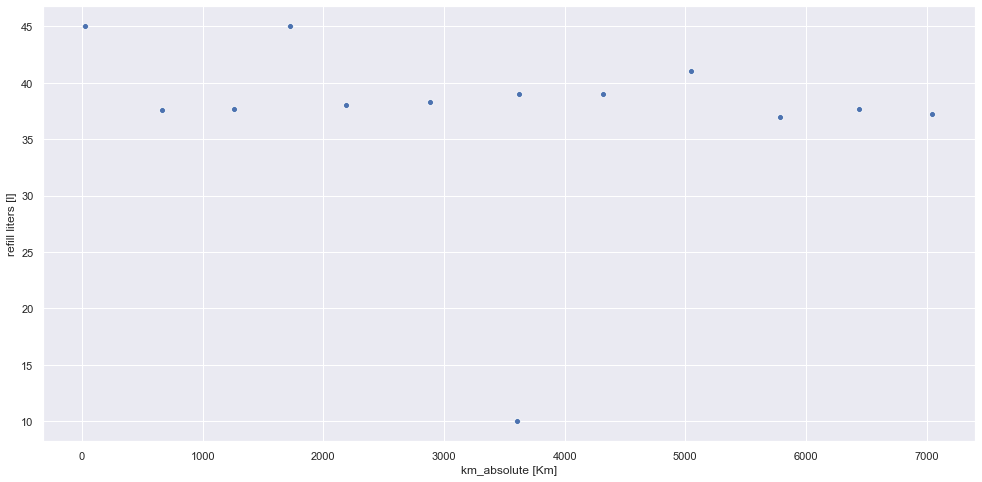

In [16]:
plt.figure(figsize=(16.7,8))
sns.scatterplot(df[df['refill liters']>0]['km_absolute'],df[df['refill liters']>0]['refill liters'])
plt.xlabel('km_absolute [Km]')
plt.ylabel('refill liters [l]')

**Some statistic about the distances and speed**
 - I would like to know how standard are the measurements

In [17]:
km_e10 = df[df['gas_type'] == 'E10']['distance'].sum()
km_sp98 = df[df['gas_type'] == 'SP98']['distance'].sum()

avg_e10 = df[df['gas_type'] == 'E10']['distance'].mean()
avg_sp98 = df[df['gas_type'] == 'SP98']['distance'].mean()

std_e10 = df[df['gas_type'] == 'E10']['distance'].std()
std_sp98 = df[df['gas_type'] == 'SP98']['distance'].std()

print('DISTANCES:')
print('Kilometers with E10: ' + str(km_e10))
print('Kilometers with SP98: ' + str(km_sp98))
print('Average distance with E10: ' + str(avg_e10))
print('Average distance with SP98: ' + str(avg_sp98))
print('Deviation of the distances with E10: ' + str(std_e10))
print('Deviation of the distancees with SP98: ' + str(std_sp98))
print('\n')
print(100*'*')
print('\n')
print('SPEED:')
avg_sp_e10 = df[df['gas_type'] == 'E10']['speed'].mean()
avg_sp_sp98 = df[df['gas_type'] == 'SP98']['speed'].mean()

std_sp_e10 = df[df['gas_type'] == 'E10']['speed'].std()
std_sp_sp98 = df[df['gas_type'] == 'SP98']['speed'].std()

print('Average speed with E10: ' + str(avg_sp_e10))
print('Average speed with SP98: ' + str(avg_sp_sp98))
print('Deviation of the speed with E10: ' + str(std_sp_e10))
print('Deviation of the speed with SP98: ' + str(std_sp_sp98))

DISTANCES:
Kilometers with E10: 3375.4
Kilometers with SP98: 4249.9
Average distance with E10: 21.09625
Average distance with SP98: 18.639912280701754
Deviation of the distances with E10: 20.307234165044786
Deviation of the distancees with SP98: 24.17959845593116


****************************************************************************************************


SPEED:
Average speed with E10: 43.50625
Average speed with SP98: 40.82017543859649
Deviation of the speed with E10: 14.077948711978848
Deviation of the speed with SP98: 13.170121570119575


# Step 3: Aggregating the data

## I think the consumption according to the board computer is not real
1. I want to see, how manny liter is needed for a trip.
2. I calculate the consumption from the refill volume.

Labeling the rows, which refill period is the actual. 

In [18]:
num = df['refill liters'].count()
num_list = []

for i in range(num):
    num_list.append(i)
num_list = num_list[::-1]
    
def refill_events(x):
    if x > 0:
        return num_list.pop()
    else:
        pass
#Crteating the event column   
df['refill_event'] = df['refill liters'].apply(refill_events)

The refill liters column is only have the values when the tank is refilled. I need the values for each row then I can use them to calculate something.
The events values have been calculated from the refill liters column so I do the same thing. So I have the correspondig data to each tank period.

In [19]:
#The na values have to be replaced with the last value
df['refill liters'].fillna(method = 'bfill', inplace = True)
df['refill_event'].fillna(method = 'bfill', inplace = True)

Creating an aggregated Dataframe groupped by the refill events.
 - The values in every row, represents the parameters after every refill.
 
In the table it is obvious, that something is not ok.
 - The 3. and 4. event has a huge difference in the refill volume and the consumption according to the board computer.
 - 6. Event the car was not fully refueled. Here the consumption cannot be calculated from the distance and the refill liters.
 - 7. event is very short
     

In [20]:
consume_per_refill = df.groupby('refill_event').agg({'consume_liter': sum, 'refill liters': np.mean, 'gas_type' : 'first', 'km_absolute': 'last','distance':sum})
consume_per_refill.sort_values('km_absolute', inplace= True)

In [21]:
consume_per_refill

,consume_liter,refill liters,gas_type,km_absolute,distance
refill_event,,,,,
0.0,1.4000,45.0,E10,28.0,28.0
1.0,32.7292,37.6,E10,662.3,634.3
2.0,29.8031,37.7,SP98,1262.8,600.5
3.0,24.4745,45.0,SP98,1725.4,462.6
4.0,24.7634,38.0,SP98,2192.3,466.9
5.0,33.8630,38.3,E10,2887.4,695.1
6.0,33.9869,10.0,E10,3609.2,721.8
7.0,0.5082,39.0,SP98,3621.3,12.1
8.0,32.3618,39.0,SP98,4317.9,696.6


Text(0, 0.5, '[liter]')

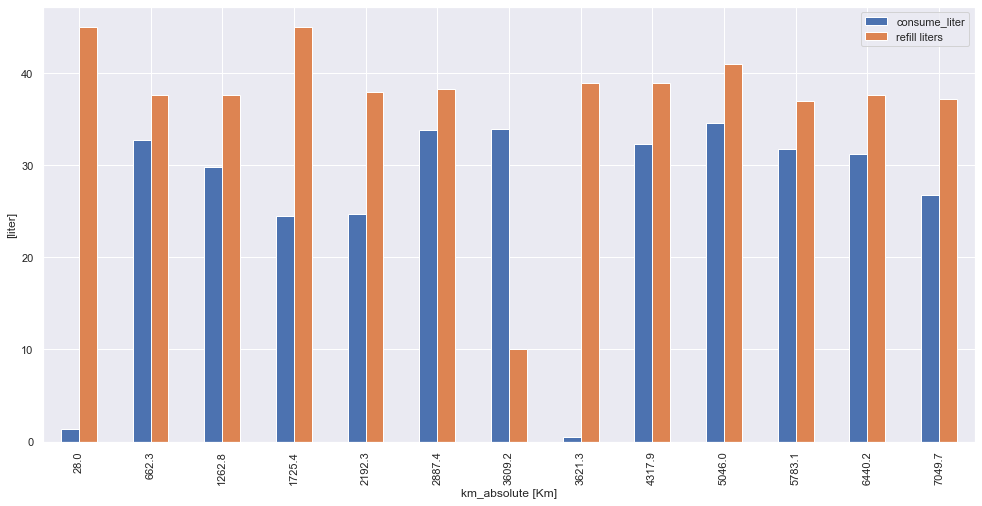

In [22]:
consume_per_refill.round(2).plot('km_absolute',['consume_liter','refill liters'], kind='bar',figsize=(16.7,8))
plt.xlabel('km_absolute [Km]')
plt.ylabel('[liter]')

To see how much liter in  the tank, I created a column, where can be seen the theoretical volume. 


I did a correction, to get correct results.
As you can see in the diagram the volume of the tank is rising up, what of course not possible.

In [23]:
consume_per_refill['tank_inhalt'] = 0
consume_per_refill['tank_inhalt'] =-consume_per_refill['consume_liter']+consume_per_refill['refill liters']
consume_per_refill['tank_inhalt'] = consume_per_refill['tank_inhalt']
#The first fefill supopse to be 45l.
consume_per_refill['tank_inhalt'].loc[0] = 45
consume_per_refill['tank_inhalt'] = consume_per_refill['tank_inhalt'].cumsum()

c:\users\mesza\.virtualenvs\tools-qxvnxo1s\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [24]:
consume_per_refill

,consume_liter,refill liters,gas_type,km_absolute,distance,tank_inhalt
refill_event,,,,,,
0.0,1.4000,45.0,E10,28.0,28.0,45.0000
1.0,32.7292,37.6,E10,662.3,634.3,49.8708
2.0,29.8031,37.7,SP98,1262.8,600.5,57.7677
3.0,24.4745,45.0,SP98,1725.4,462.6,78.2932
4.0,24.7634,38.0,SP98,2192.3,466.9,91.5298
5.0,33.8630,38.3,E10,2887.4,695.1,95.9668
6.0,33.9869,10.0,E10,3609.2,721.8,71.9799
7.0,0.5082,39.0,SP98,3621.3,12.1,110.4717
8.0,32.3618,39.0,SP98,4317.9,696.6,117.1099


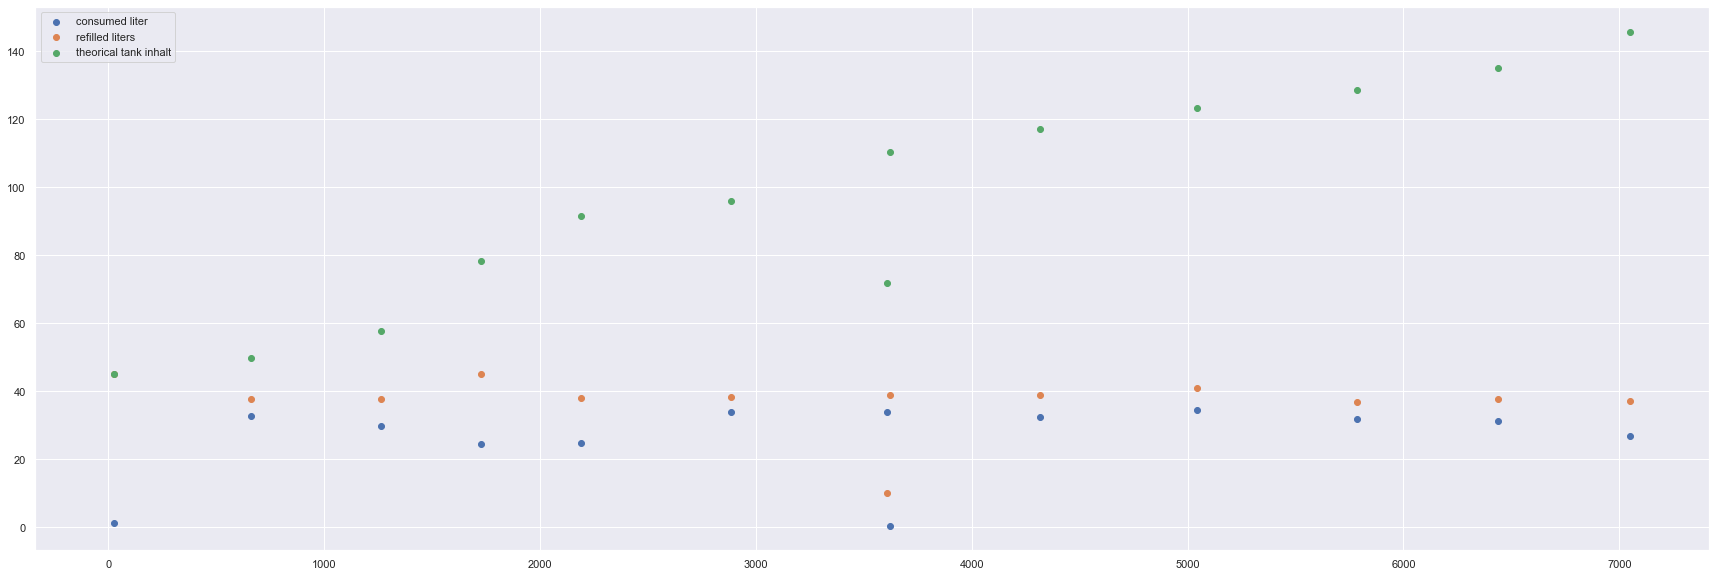

In [25]:
plt.figure(figsize=(30,10))
plt.scatter(consume_per_refill['km_absolute'],consume_per_refill['consume_liter'],)
plt.scatter(consume_per_refill['km_absolute'],consume_per_refill['refill liters'],)
plt.scatter(consume_per_refill['km_absolute'],consume_per_refill['tank_inhalt'],)
plt.legend(['consumed liter','refilled liters','theorical tank inhalt'])

In [26]:
#Calculating the real consumption value
consume_per_refill['consume_from_refill'] = consume_per_refill['refill liters']/consume_per_refill['distance']*100
#Changing the nem of the consume_liter column because this value is the value from the board computer
consume_per_refill.rename(columns = {'consume_liter' : 'consumption_board_comp_l'}, inplace = True)

# Step 4: Data cleaning (correcting, refilling values)

I would like to correct the consumption values. I guess that the ratios of the consumptions from the boardcomputer are correct. I use the volume of the used gas volume as 100%. Than I calculate for each row the percentage of the used gas.
 I use this percentage value to correct the consumption for each trip. I multiplied this value  with the refill liters. In this way the consumed volume will equal to the refilled volume. Which is logical :) 

In [27]:
#Merging the aggregated table to the original df, then I have all calculetad value in the whole dataframe in each refill periods (events)
extended_df = df.merge(consume_per_refill['consumption_board_comp_l'], on='refill_event', how='outer')


#Calculating the ratio
extended_df['consume_ratio'] = extended_df['consume_liter']/extended_df['consumption_board_comp_l']

#Calculating the corrected value
extended_df['consumption_after_correction'] = extended_df['consume_ratio']*extended_df['refill liters']

#Checking the values
extended_df[['consume_liter','refill liters','consumption_board_comp_l','consume_ratio','consumption_after_correction']]

#Converting the values to [l/100km]
extended_df['consume_corrected'] = extended_df['consumption_after_correction']/extended_df['distance']*100

In [28]:
#checking the correction
extended_df.groupby('refill_event').agg({'consumption_after_correction' : sum, 'refill liters' : 'last'})

,consumption_after_correction,refill liters
refill_event,,
0.0,45.0,45.0
1.0,37.6,37.6
2.0,37.7,37.7
3.0,45.0,45.0
4.0,38.0,38.0
5.0,38.3,38.3
6.0,10.0,10.0
7.0,39.0,39.0
8.0,39.0,39.0


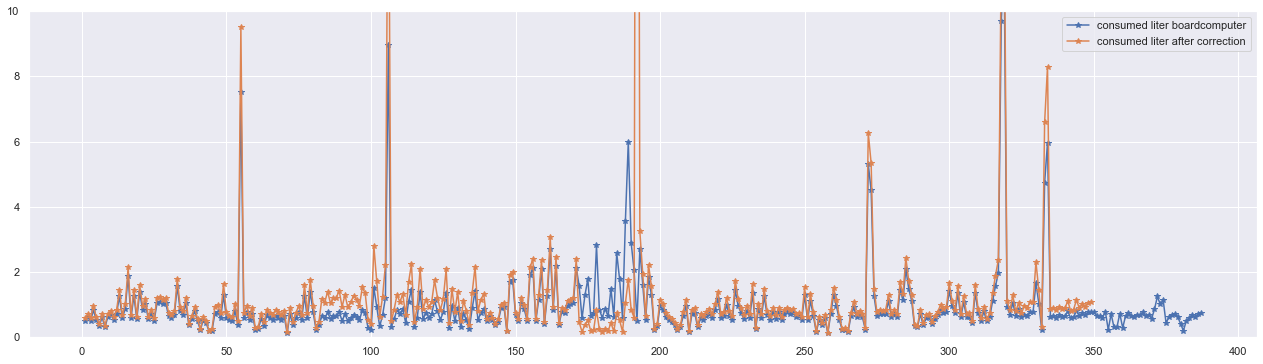

In [29]:
plt.figure(figsize=(22,6))
plt.ylim([0,10])
plt.plot(extended_df['consume_liter'].loc[1:],marker='*')
plt.plot(extended_df['consumption_after_correction'][1:], marker='*')
plt.legend(['consumed liter boardcomputer','consumed liter after correction'],loc = 'upper right')

I would like to see the NaN values in the dataframe to know, where needed some fill operation. Furthermore, one of the most important columns the gas_type is a string column, I need to replace the values with integers.

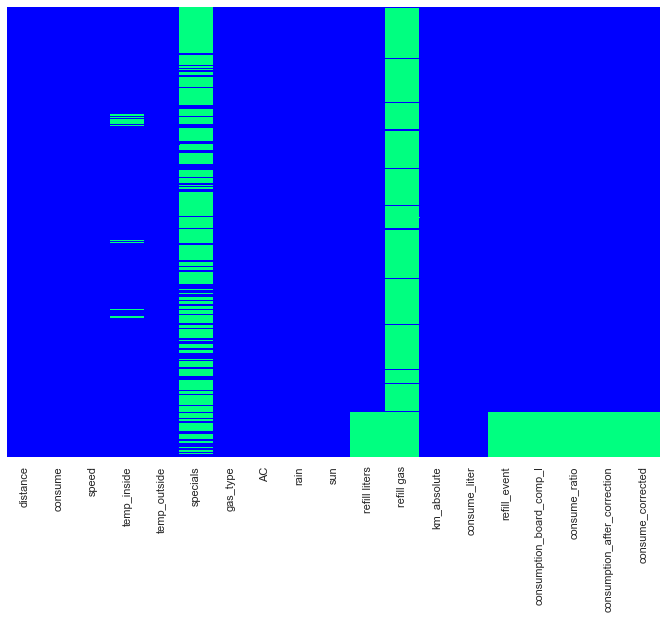

In [30]:
sns.heatmap(extended_df.isnull(), cmap='winter', yticklabels = False, cbar = False)

There are values in the temp_inside column what I need to replace. The other two columns are not interesting for me, in the specials column there are just few values, and the refill gas column is not important for me as well.
1. Creating a fuction to replace the strings to integer.
2. Filling the missing rows in the temp_inside
3. Creating a new column with the differnce
4. Creating a test data set from the last few rows

In [31]:
#Function to change the gas_type column string values to integer, then they can be used in the ML section.
def gasType(x):
    if x == 'E10':
        return 0
    else:
        return 1

#Applying the function    
extended_df['gas_type_int'] = extended_df['gas_type'].apply(gasType)
#Just a few value is missing, I use the mean of the full column to fill the NaN values
fill_temp_inside = np.mean(extended_df['temp_inside'])
extended_df['temp_inside'].fillna(fill_temp_inside,inplace = True)

#Calculating a delta T column to see the difference between the inside and outer temperature
extended_df['delta_t'] = extended_df['temp_inside']-extended_df['temp_outside']

In [32]:
test_data = extended_df[extended_df['consume_corrected'].isnull()]

Most of the values are small, and the data is normal distributed, so I get rid of the trips, where the consumption are extreme.
There are some irreal values, because of the correction, and because the 6. 7. refill event was not full tank. (aggregated table)

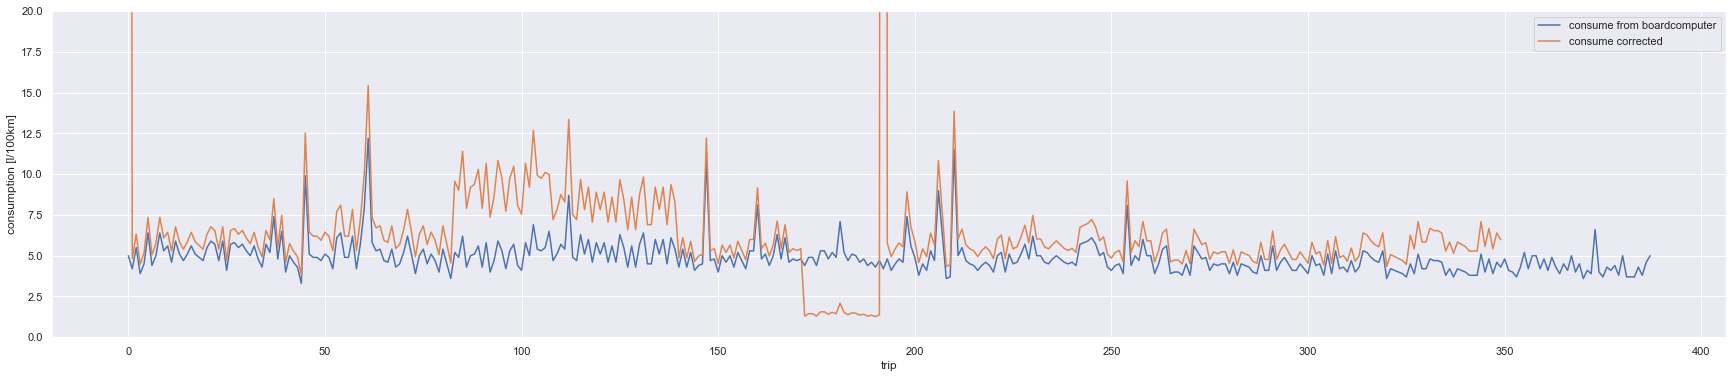

In [33]:
plt.figure(figsize=(30,6))
plt.plot(range(0,len(extended_df)),extended_df[['consume','consume_corrected']])
plt.ylim(0,20)
plt.xlabel('trip')
plt.ylabel('consumption [l/100km]')
plt.legend(['consume from boardcomputer','consume corrected'])

It's look like the values between the ~75-140 trips are not ok.  
These are the 3. and 4. events.

In [34]:
#Checking the values which event is that
extended_df[(extended_df['consume_corrected']>7.5) & (extended_df['consume_corrected'].shift(1)>7.5) \
            & (extended_df['consume_corrected'].shift(-1)>7.5)][['refill_event','consume_corrected']].groupby('refill_event').count()

,consume_corrected
refill_event,
3.0,20
4.0,6


I filter out the rows what can be lead to missunderstandung. The rows from the 3.4. events has been deleted and the rows where the consumption is too big or too small.

In [35]:
extended_df = extended_df[~((extended_df['refill_event'] == 6) | (extended_df['refill_event'] == 7) | (extended_df['refill_event'] == 3) | (extended_df['refill_event'] == 4)) \
                          & ((extended_df['consume_corrected'] > 3) & (extended_df['consume_corrected'] < 8))]


Text(0, 0.5, 'speed [km/h]')

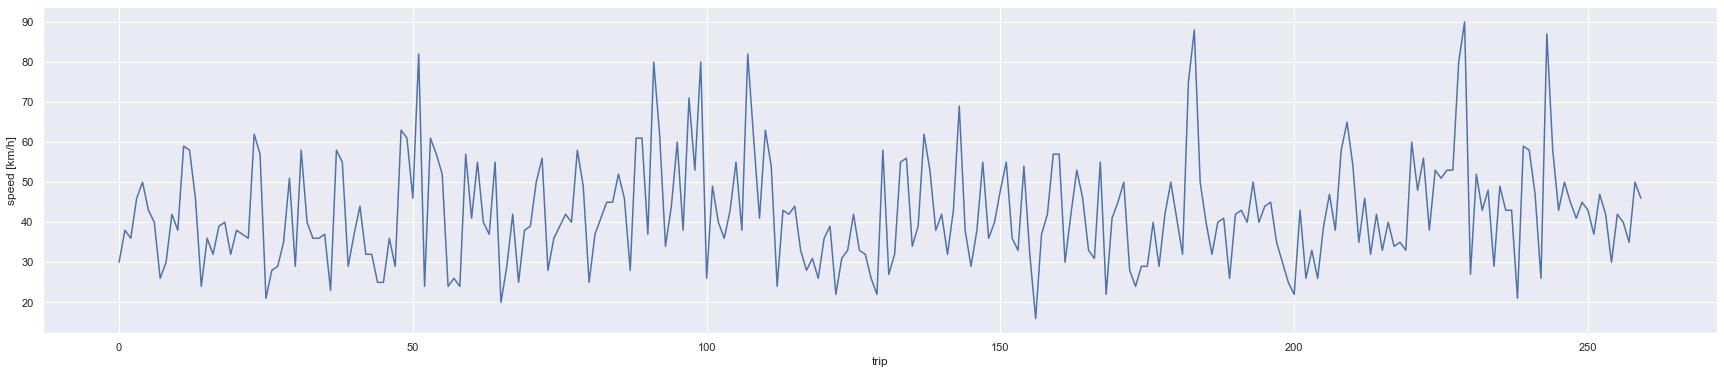

In [36]:
plt.figure(figsize=(30,6))
plt.plot(range(0,len(extended_df)),extended_df[['speed']])
plt.xlabel('trip')
plt.ylabel('speed [km/h]')

How many data have we from the AC, rain, sun

In [37]:
print('AC is on ' + str(extended_df[extended_df['AC']>0]['consume'].count()) + 'x')
print('Sunny days ' + str(extended_df[extended_df['sun']>0]['consume'].count()) + 'x')
print('Rainy days ' + str(extended_df[extended_df['rain']>0]['consume'].count()) + 'x')

AC is on 15x
Sunny days 25x
Rainy days 25x


In [38]:
print('There are {} rows, have we after the data cleaning'.format(extended_df['consume'].count()))

There are 260 rows, have we after the data cleaning


Let's see whats the average consumption with the fuels.

In [39]:
print('The consumption with E10 is {}l'.format(round(extended_df[extended_df['gas_type_int'] == 0]['consume'].mean(),2)))
print('The consumption with SP98 is {}l'.format(round(extended_df[extended_df['gas_type_int'] == 1]['consume'].mean(),2)))
print('\n')
print('The consumption with E10 is {}l'.format(round(extended_df[extended_df['gas_type_int'] == 0]['consume_corrected'].mean(),2)))
print('The consumption with SP98 is {}l'.format(round(extended_df[extended_df['gas_type_int'] == 1]['consume_corrected'].mean(),2)))

The consumption with E10 is 4.82l
The consumption with SP98 is 4.65l


The consumption with E10 is 5.74l
The consumption with SP98 is 5.63l


# Step 5: Linear Regression

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

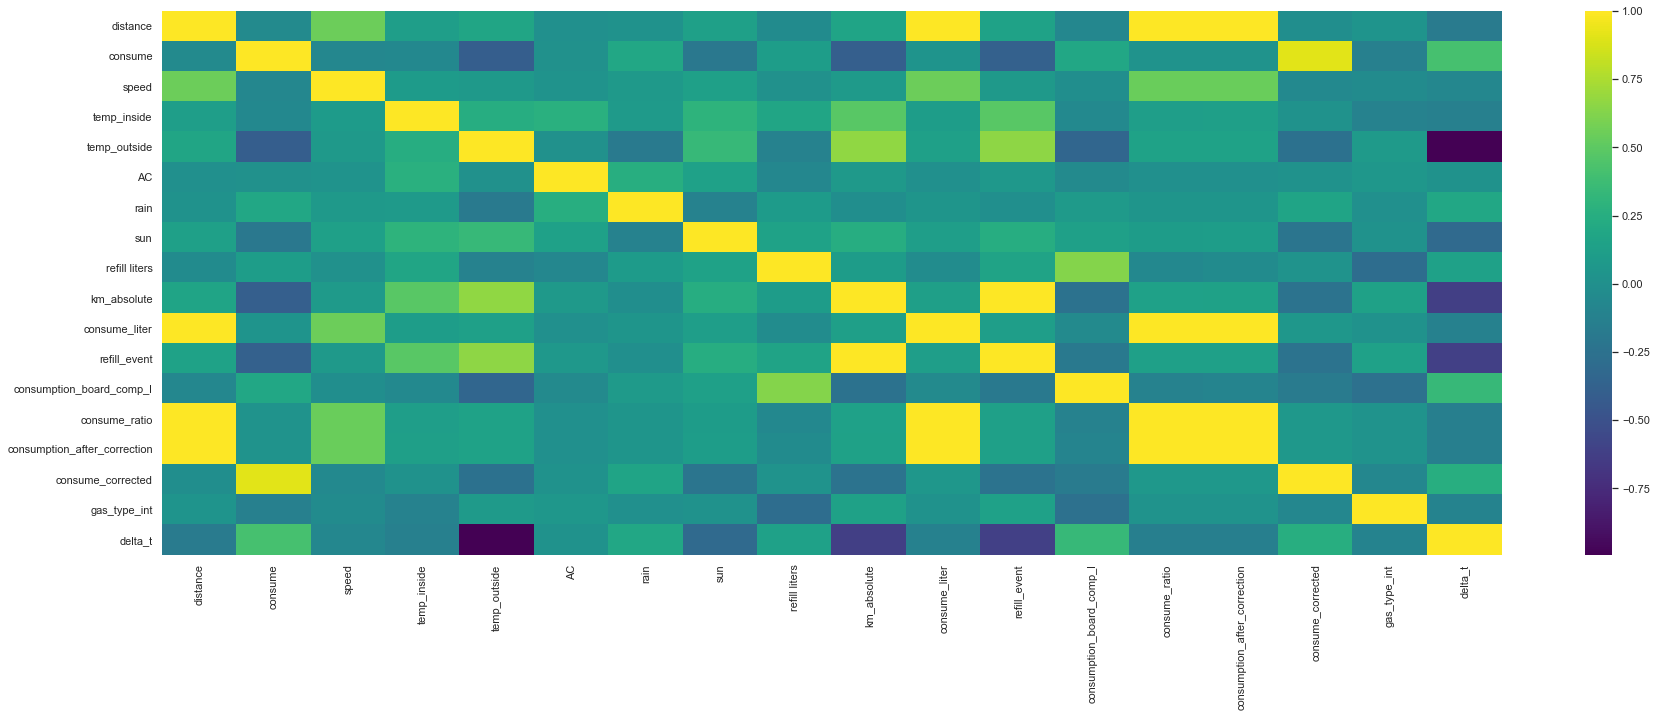

In [41]:
plt.figure(figsize=(30,10))
sns.heatmap(extended_df.corr(),cmap='viridis')

In [42]:
X1 = extended_df[['speed','distance','temp_inside','gas_type_int','rain','sun','delta_t','AC']]
y1 = extended_df['consume']

X2 = extended_df[['speed','distance','temp_inside','gas_type_int','rain','sun','delta_t','AC']]
y2 = extended_df['consume_corrected']

X3 = extended_df[['speed','distance','temp_inside','gas_type_int','rain','sun','delta_t','AC']]
y3 = extended_df['consume']


X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1, test_size=0.3, random_state = 101)
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y2, test_size=0.3, random_state = 101)

X_test3 = test_data[['speed','distance','temp_inside','gas_type_int','rain','sun','delta_t','AC']]
y_test3 = test_data['consume']

X_train3 = extended_df[['speed','distance','temp_inside','gas_type_int','rain','sun','delta_t','AC']]
y_train3 = extended_df['consume']

X_train4 = extended_df[['speed','distance','temp_inside','gas_type_int','rain','sun','delta_t','AC']]
y_train4 = extended_df['consume_corrected']

lm1 = LinearRegression()
lm2 = LinearRegression()
lm3 = LinearRegression()
lm4 = LinearRegression()

lm1.fit(X_train1,y_train1)
lm2.fit(X_train2,y_train2)
lm3.fit(X_train3,y_train3)
lm4.fit(X_train4,y_train4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- a: Original consumption with splitted data (30%-test;70%-train)
- b: Corrected consumption with splitted data (30%-test;70%-train)
- c: Original consumption with splitted data (full data*)
- d: Corrected consumption with splitted data (full data*)

*Without the last few trips where there are no informations about the last refill

In [46]:
a = pd.DataFrame(lm1.coef_,X1.columns,columns=['Original Consumption (splitted data)'])
b = pd.DataFrame(lm2.coef_,X2.columns,columns=['Corrected Consumption (splitted data)'])
c = pd.DataFrame(lm3.coef_,X3.columns,columns=['Original Consumption (full data)'])
#d = pd.DataFrame(lm4.coef_,X4.columns,columns=['Corrected Consumption(full data)'])

merge_b_c = b.merge(c,right_index=True, left_index=True)
#merge_b_c_d = merge_b_c.merge(d,right_index=True, left_index=True)
#summery = a.merge(merge_b_c_d,right_index=True, left_index=True)
#summery

-------------------------------

# Step 6: Evaluating the results

In [47]:
pred1 = lm1.predict(X_test1)
pred2 = lm2.predict(X_test2)
pred3 = lm3.predict(X_test3)


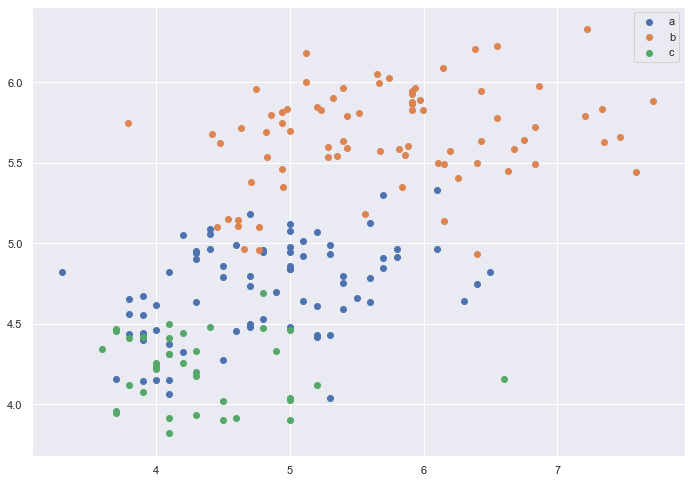

In [48]:
plt.scatter(y_test1,pred1)
plt.scatter(y_test2,pred2)
plt.scatter(y_test3,pred3)
plt.legend(['a','b','c'])

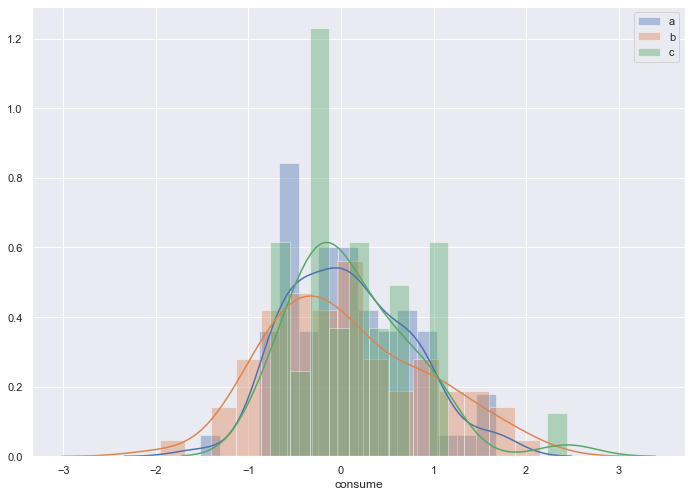

In [49]:
sns.distplot(y_test1-pred1, bins=15)
sns.distplot(y_test2-pred2, bins=15)
sns.distplot(y_test3-pred3, bins=15)
plt.legend(['a','b','c'])

In [50]:
print('Original Consumption: ')
print('MAE: ' + str(metrics.mean_absolute_error(y_test1,pred1)))
print('MSE: ' + str(metrics.mean_squared_error(y_test1,pred1)))
print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y_test1,pred1))))
print('R^2: ' + str(metrics.r2_score(y_test1,pred1)))
print('\n')

print('Corrected Consumption: ')
print('MAE: ' + str(metrics.mean_absolute_error(y_test2,pred2)))
print('MSE: ' + str(metrics.mean_squared_error(y_test2,pred2)))
print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y_test2,pred2))))
print('R^2: ' + str(metrics.r2_score(y_test2,pred2)))
print('\n')

print('Original Consumption (full data): ')
print('MAE: ' + str(metrics.mean_absolute_error(y_test3,pred3)))
print('MSE: ' + str(metrics.mean_squared_error(y_test3,pred3)))
print('RMSE: ' + str(np.sqrt(metrics.mean_squared_error(y_test3,pred3))))
print('R^2: ' + str(metrics.r2_score(y_test3,pred3)))

Original Consumption: 
MAE: 0.5284533145952279
MSE: 0.4297897025291607
RMSE: 0.6555834825017792
R^2: 0.15194268852590764


Corrected Consumption: 
MAE: 0.6836088019127207
MSE: 0.7156883070762685
RMSE: 0.8459836328654761
R^2: 0.052170494194122785


Original Consumption (full data): 
MAE: 0.5021965685386264
MSE: 0.44604094830940694
RMSE: 0.6678629712069737
R^2: -0.2908253589570189
